<a href="https://colab.research.google.com/github/cgangwar11/Coding-Practice/blob/master/practice_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.pytorch.org/tutorial/data.zip

--2019-03-30 08:18:38--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 54.230.75.71, 54.230.75.21, 54.230.75.45, ...
Connecting to download.pytorch.org (download.pytorch.org)|54.230.75.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip.2’

data.zip.2          100%[===================>]   2.75M  --.-KB/s    in 0.09s   

2019-03-30 08:18:39 (31.9 MB/s) - ‘data.zip.2’ saved [2882130/2882130]



In [2]:
!unzip data.zip

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/names/Arabic.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/names/Chinese.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/names/Czech.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/names/Dutch.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
!ls data/

eng-fra.txt  names


### Data Preprocessing


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import *

In [0]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [0]:
import glob
import unicodedata
import string




In [0]:
file_list = glob.glob('data/names/*.txt')

In [0]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [0]:
file = open(file_list[0],'r')

In [0]:
out = list(file.readlines())

In [0]:
def readlines(filename):
    out = open(filename).read().strip().split('\n')
    return [unicode_to_ascii(i) for i in out]



In [0]:
all_categories = []
names = {}
category_to_int = {}
for file in file_list:
    category = file.split('/')[-1].split('.txt')[0]
    category = category.strip().lower()
    names[category] = readlines(file)
    all_categories.append(category)

In [0]:
category_to_int = {j:i for i,j in enumerate(all_categories)}
all_letters_to_int = {j:i for i,j in enumerate(all_letters)}
def category_to_tensor(i):
    out=torch.zeros((1,len(all_categories)))
    out[0,category_to_int[i]]=1
    return out

def word_to_tensor(word):
    out = []
    for i in range(15):
        try:
            pp =np.zeros((1,len(all_letters)))
            index = all_letters_to_int[word[i]]
            pp[0,index]=1
           # print(pp)
            out.append(pp)
        except:
            t=np.zeros((1,len(all_letters)))
            t[0,52]=1
            out.append(t)
    out=np.array(out)
    return torch.Tensor(out).view(15,len(all_letters))
        
        

In [14]:
print(all_letters_to_int)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, ' ': 52, '.': 53, ',': 54, ';': 55, "'": 56}


In [15]:
np.zeros((1,100))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [16]:
word_to_tensor('Chandan').shape

torch.Size([15, 57])

In [0]:
class RNN(nn.Module):
    def __init__(self,num_embedding,embedding_dim,hidden_size):
        super(RNN,self).__init__()
#         self.embedding = nn.Embedding(num_embeddings=num_embedding,embedding_dim=embedding_dim)
        self.rnn = nn.RNN(input_size = embedding_dim,hidden_size=hidden_size)
        self.linear = nn.Linear(hidden_size*15,len(all_categories))
        
    def forward(self,input):
#         out = self.embedding(input)
#         out = out.view(len(input),-1,int(len(all_letters)/2))
        out,_ = self.rnn(input)
        sh = out.shape
        print(sh)
#         out = out[:,-1,:]
        out = self.linear(out)
        return F.softmax(out)
        

In [43]:
model = RNN(len(all_letters),len(all_letters),128)
model.to(torch.device('cuda'))

RNN(
  (rnn): RNN(57, 128)
  (linear): Linear(in_features=1920, out_features=18, bias=True)
)

In [50]:
model(data[0][0].unsqueeze(1).to(device))

torch.Size([15, 1, 128])


RuntimeError: ignored

In [0]:
pair = []
for key,value in names.items():
    for name in value:
        pair.append((key,name))

In [0]:
class NameLanguageDataset(Dataset):
    
    def __init__(self,pair):
        self.source = pair
        
    def __len__(self):
        return len(self.source)
    
    def __getitem__(self,idx):
        language,name = self.source[idx]
        return word_to_tensor(name),category_to_int[language],name

In [0]:
data = NameLanguageDataset(pair)
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}

generator = DataLoader(data,**params)

In [23]:
data[0][0].shape

torch.Size([15, 57])

In [0]:
loss = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters())

In [0]:
los=[]

In [26]:

device = torch.device('cuda')
#los = []
for epoch in range(5):
    for X,y,_ in generator:
        X=X.view(-1,15,57)
        
        X,y = X.to(device),y.to(device)
        optimizer.zero_grad()
      #  print(y.shape)
       # print(y,)
        # print(X.shape,_)
        out = model(X)
        
        #print(out.shape,y.view(64,18).shape)
        lossi = loss(out,y)
        los.append(lossi)
        lossi.backward()
        optimizer.step()
    print('hey',epoch)
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


hey 0
hey 1
hey 2
hey 3
hey 4
hey 5
hey 6
hey 7
hey 8
hey 9
hey 10
hey 11
hey 12
hey 13
hey 14
hey 15
hey 16
hey 17
hey 18
hey 19
hey 20
hey 21
hey 22
hey 23
hey 24
hey 25
hey 26
hey 27
hey 28
hey 29
hey 30
hey 31
hey 32
hey 33
hey 34
hey 35
hey 36
hey 37
hey 38
hey 39
hey 40
hey 41
hey 42
hey 43
hey 44
hey 45
hey 46
hey 47
hey 48
hey 49
hey 50
hey 51
hey 52
hey 53
hey 54
hey 55
hey 56
hey 57
hey 58
hey 59
hey 60
hey 61
hey 62
hey 63
hey 64
hey 65
hey 66
hey 67
hey 68
hey 69
hey 70
hey 71
hey 72
hey 73
hey 74
hey 75
hey 76
hey 77
hey 78
hey 79
hey 80
hey 81
hey 82
hey 83
hey 84
hey 85
hey 86
hey 87
hey 88
hey 89
hey 90
hey 91
hey 92
hey 93
hey 94
hey 95
hey 96
hey 97
hey 98
hey 99


In [27]:
los


[tensor(-0.0553, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0567, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0583, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0586, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0617, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0634, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0673, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0698, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0787, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.0869, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1073, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1263, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1416, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1527, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1480, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(-0.1819, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(

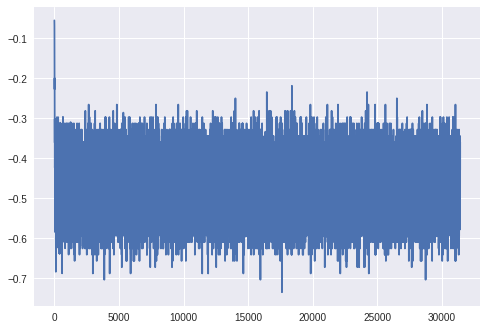

In [32]:
plt.plot(los)

In [28]:
model.to(torch.device('cuda'))

RNN(
  (rnn): RNN(57, 128)
  (linear): Linear(in_features=128, out_features=18, bias=True)
)

In [29]:
torch.zeros(5).long()

tensor([0, 0, 0, 0, 0])

In [30]:
torch.randint(10,(10,10))

tensor([[2, 2, 9, 0, 5, 5, 0, 0, 2, 4],
        [8, 7, 4, 1, 9, 3, 1, 4, 9, 1],
        [2, 1, 5, 0, 0, 5, 3, 9, 4, 6],
        [3, 7, 2, 5, 4, 7, 0, 5, 0, 9],
        [5, 8, 2, 8, 3, 9, 2, 5, 0, 4],
        [2, 4, 6, 6, 6, 0, 3, 2, 4, 7],
        [5, 2, 3, 3, 5, 3, 1, 3, 2, 1],
        [8, 7, 6, 1, 7, 9, 8, 8, 4, 3],
        [6, 3, 8, 8, 6, 9, 7, 5, 1, 9],
        [4, 6, 9, 9, 2, 6, 5, 1, 9, 8]])

In [31]:
model(data[0][0]),data[0][1]

RuntimeError: ignored

In [0]:
print(all_letters)

In [0]:
model = RNN(27,5,5)

In [0]:
model(torch.LongTensor([[5,6,7,8],[10,1,2,4]])).shape